# **종합실습2 이변량분석(y-범주) : 직원 이직 분석**

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

## **1.환경준비**

* 라이브러리 불러오기

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [15]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,27,2,1898,Female,3,Single,6500,No,14,9
1,0,27,9,1965,Male,4,Single,4105,No,14,7
2,0,44,2,1703,Female,4,Married,7879,Yes,19,9
3,0,42,2,1231,Male,1,Married,6272,No,16,10
4,0,32,1,2016,Female,4,Married,10422,No,19,14


> * 변수설명
    * **Attrition**	:	이직여부, Yes=1 , No=0 (**Target**) (범주)
    * **Age**	:	나이
    * **DistanceFromHome**	:	집-직장 거리(마일)
    * **EmployeeNumber**	:	사번
    * **Gender**	:	성별(Male, Female)
    * **JobSatisfaction**	:	직무 만족도, 다음시트 참조 (1~4 범주)
    * **MaritalStatus**	:	결혼상태(Married, Single, Divorced)
    * **MonthlyIncome**	:	월급(달러)
    * **OverTime**	:	야근여부
    * **PercentSalaryHike**	:	전년대비 급여인상율(%) (숫자)
    * **TotalWorkingYears**	:	총 근무 연수



## **2.범주-->범주**

In [61]:
target = 'Attrition' #이직여부

### **(1) Gender --> Attrition**

In [64]:
feature = 'Gender' #성별

* 교차표

In [67]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender,Female,Male
Attrition,,
0,157,248
1,66,129


In [69]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

Gender,Female,Male
Attrition,,
0,0.704036,0.657825
1,0.295964,0.342175


* 시각화

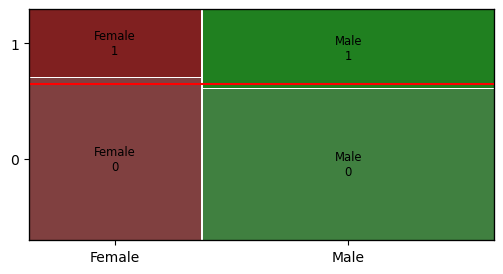

In [72]:
#plt.figure는 해당 코드에서만 적용되고 밑처럼 rcParams는 해당 파일내의 모든 그래프가 해당 사이즈로 적용되어 실행됨
plt.rcParams["figure.figsize"]=(6,3)
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [75]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             157   248
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.1614318259891623
p-value 0.28116879016055174
자유도 1
기대빈도
 [[150.525 254.475]
 [ 72.475 122.525]]


* 파악된 내용을 기술해 봅시다.

In [78]:
# 카이제곱검정으로는 관련이 없다고 나오나, 그래프로 볼때 약간 관련이 있다고 판단됨. 그러나 거의 미미 없다고 봐야...

### **(2) JobSatisfaction --> Attrition**

In [189]:
feature = 'JobSatisfaction' #직무만족도

* 교차표

In [192]:
pd.crosstab(data[target], data[feature])

JobSatisfaction,1,2,3,4
Attrition,,,,
0,74,79,114,138
1,52,37,59,47


In [194]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.587302,0.681034,0.65896,0.745946
1,0.412698,0.318966,0.34104,0.254054


* 시각화

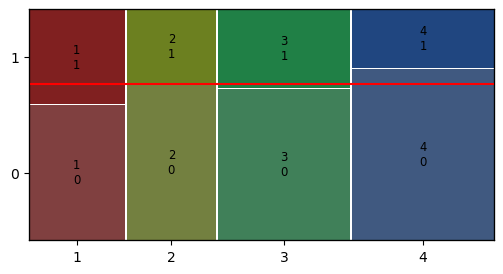

In [197]:
temp = data.sort_values('JobSatisfaction')

mosaic(temp, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [93]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 JobSatisfaction   1   2    3    4
Attrition                        
0                74  79  114  138
1                52  37   59   47
----------------------------------------------------------------------------------------------------
카이제곱통계량 8.884191097554549
p-value 0.03087092125625072
자유도 3
기대빈도
 [[ 85.05   78.3   116.775 124.875]
 [ 40.95   37.7    56.225  60.125]]


* 파악된 내용을 기술해 봅시다.

In [ ]:
#카이제곱결과를 보면 관계가 있다고 나옴, 그래프로 볼때도 어느정도 관련이 있어보임.

### **(3) MaritalStatus --> Attrition**

In [98]:
feature = 'MaritalStatus' #결혼상태

* 교차표

In [101]:
pd.crosstab(data[target], data[feature])

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,89,205,111
1,23,69,103


In [103]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,0.794643,0.748175,0.518692
1,0.205357,0.251825,0.481308


* 시각화

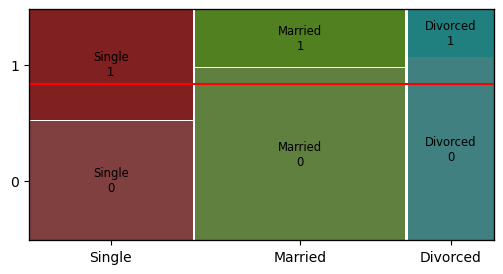

In [106]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [109]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                    89      205     111
1                    23       69     103
----------------------------------------------------------------------------------------------------
카이제곱통계량 37.829711907070525
p-value 6.100738829354226e-09
자유도 2
기대빈도
 [[ 75.6  184.95 144.45]
 [ 36.4   89.05  69.55]]


* 파악된 내용을 기술해 봅시다.

In [ ]:
#p-value가 0.05보다 훨씬 작으며 카이제곱도 상당히 큰값으로 두 변수 사이에 통계적으로 유의미한 관계가 있다고 볼 수 있다. 또한 그래프도 관계가 있다고 볼 수 있다.

In [ ]:
#결혼 장려.....이직율을 낮추기 위해서는 결혼 장려! 왜냐? 싱글의 이직율이 앞도적으로 높기 때문

### **(4) OverTime --> Attrition**

In [114]:
feature = 'OverTime' #야근여부

* 교차표

In [117]:
pd.crosstab(data[target], data[feature])

OverTime,No,Yes
Attrition,,
0,315,90
1,90,105


In [119]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

OverTime,No,Yes
Attrition,,
0,0.777778,0.461538
1,0.222222,0.538462


* 시각화

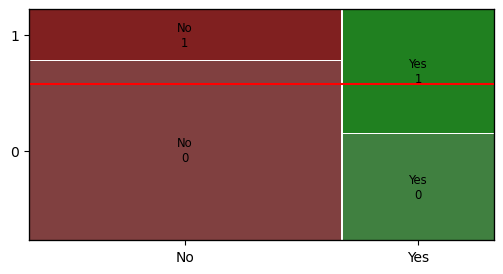

In [122]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [125]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 OverTime    No  Yes
Attrition          
0          315   90
1           90  105
----------------------------------------------------------------------------------------------------
카이제곱통계량 58.57149427899665
p-value 1.9603625783060702e-14
자유도 1
기대빈도
 [[273.375 131.625]
 [131.625  63.375]]


* 파악된 내용을 기술해 봅시다.

카이제곱통계량의 값은 크지만 p-value가 0.05보다 훨씬 넘어갔으므로 관계가 없다고 볼 수 있다. 허나 그래프를 보면 확연히 차이가 나는걸 보면 좀 더 세부적으로 분석해볼 필요가 있다.

야근을 하는 사람은 이직율이 높다, 야근을 하지 않는 사람은 이직율이 낮다. 

## **3.숫자-->범주**

### **(1) Age --> Attrition**

In [132]:
feature = 'Age'

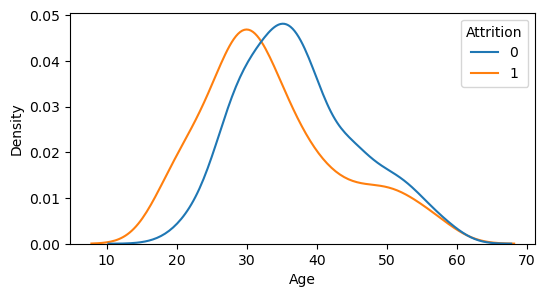

In [134]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

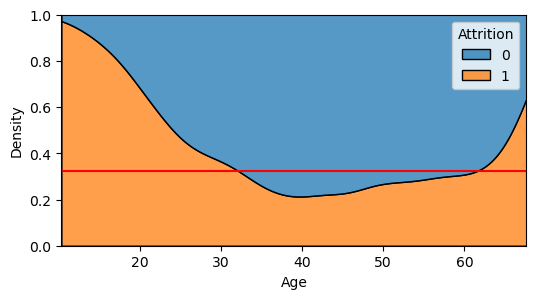

In [135]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

약 32살을 기준으로 32살 밑으로는 이직을 많이 하고 그 위로는 이직을 별로 하지 않다는 것을 볼 수 있다.

### **(2) DistanceFromHome --> Attrition**

In [141]:
feature = 'DistanceFromHome' #출근거리

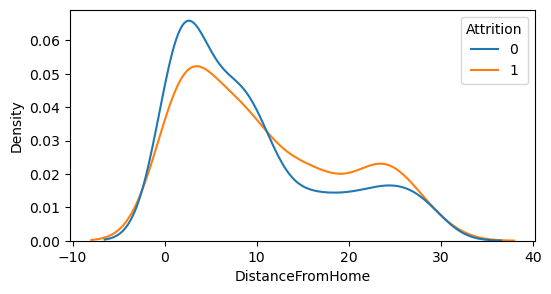

In [143]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

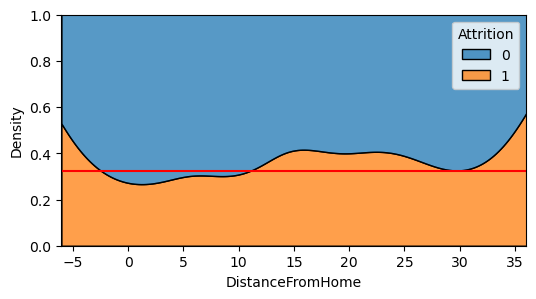

In [144]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

거리가 약 12를 넘어가는 순간부터 이직율이 늘어난다. 12이하는 이직을 안한다는 결과를 볼 수 있다.

30은 거리가 먼데 이직율이 낮아졌다 이유는? 재택근무? 임원? 자가용? 기숙사? 회사가 거리 30이상부터 숙식제공? 
어쨌든 이를 해결하기 위해 회사가 해줄 수 있는것은? 숙식제공, 출퇴근버스제공, 지원금 제공, 재택근무 등...

### **(3) MonthlyIncome --> Attrition**

In [151]:
feature = 'MonthlyIncome' #월급

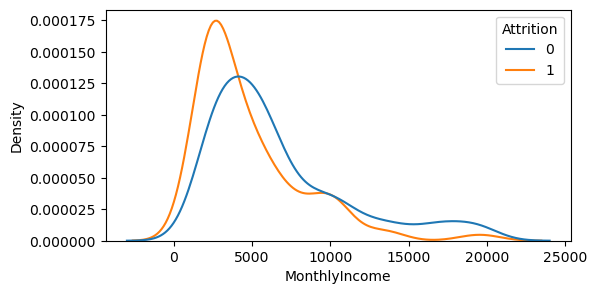

In [153]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

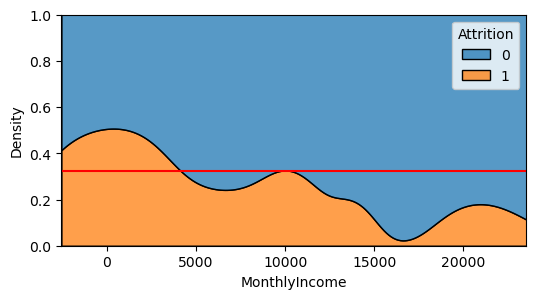

In [154]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

약 4500이하로는 이직율이 급격하게 많다가도 5000이상부터는 이직을 하지 않다가 다시 10000때는 그만큼 연차도 쌓였고 다른데로 눈이 돌아가는 시기이기에 이직율이 살짝 있다가도 그 뒤로는 이직을 거의 하지 않다는 것을 볼 수 있다.

10000대가 이직하는 이유? 스카우트, 헤드헌팅, 점프하는 시기?

### **(4) PercentSalaryHike --> Attrition**

In [161]:
feature = 'PercentSalaryHike' #급여인상율

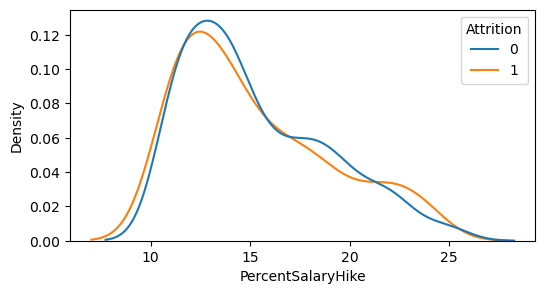

In [163]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

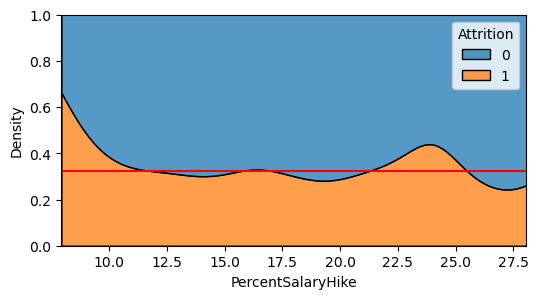

In [164]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

급여 인상율과 이직율의 그래프를 보면 거의 차이가 없다고 볼수 있다 그러므로 둘의 관계가 그렇게 있다고 볼 수 없다.

### **(5) TotalWorkingYears --> Attrition**

In [171]:
feature = 'TotalWorkingYears' #총 경력연수

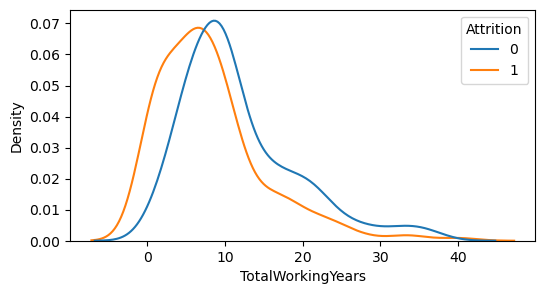

In [173]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

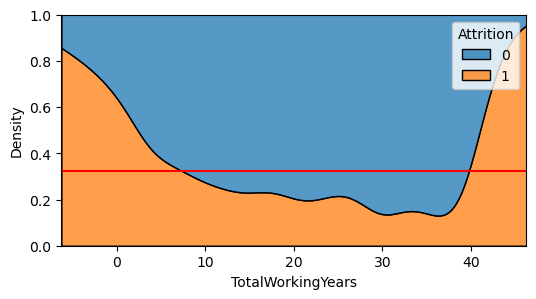

In [175]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

신입에는 이직율이 급격하게 늘어나는데 가면 갈수록 이직율이 없다가 40대 이후부터는 은퇴하는 사람들이 있어 또 이직율이 늘어난다.

## **4.관계 정리하기**

① 강한관계(카이제곱값이 크다)

총경력연수,직무만족도,결혼상태,나이

선: 결혼상태,야근여부,나이(총 경력연수),출근거리,월급

② 중간관계

월급,출근거리

선:직무만족도,급여인상율

③ 관계없음(약한 관계)

성별,야근여부,급여인상율

선: 성별

In [226]:
pd.read_csv('https://bit.ly/3PArw4W')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [230]:
corr_matrix = data.corr('tax','medv')

ValueError: could not convert string to float: 'Female'